CTAI - demo

分类模型测试集效果

In [5]:
import torch
import torchvision.transforms as transforms
from resnet_uscl import ResNetUSCL
from BUSI_dataset import BUSI_dataset_classify
from utils import get_accuracy

# 图像预处理
test_transform = transforms.Compose([
        transforms.ToTensor(),  # 转换为张量
        transforms.Resize((224, 224)),  # 调整图像大小为 224x224
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.25, 0.25, 0.25])  # 归一化
])

# 加载数据集
test_dataset = BUSI_dataset_classify(image_dir='BUSI/test', transform=test_transform)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

# 使用 cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 模型加载
pretrained = False
selfsup = True
net = ResNetUSCL(base_model='resnet18', out_dim=3, pretrained=pretrained)

print(net)
if pretrained:
    print('\nThe ImageNet pretrained parameters are loaded.')
else:
    print('\nThe ImageNet pretrained parameters are not loaded.')

# 加载预训练模型权重
state_dict_path = "pretrained_model/best_finetune_model.pth"
state_dict = torch.load(state_dict_path)
net.load_state_dict(state_dict)
net = net.to(device)

for name, param in net.named_parameters():
    print(name, '\t', 'requires_grad=', param.requires_grad)

# 分类推理
accuracy = get_accuracy(net, test_loader, device)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Random initialize model parameters.

Feature extractor: resnet18
ResNetUSCL(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4536\3148148669.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(state_dict_path)


Test accuracy: 70.94%


分类模型评估

分割模型超参数优化

D:\annaconda\envs\CTAI_demo\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\annaconda\envs\CTAI_demo\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
D:\Python_projects\CTAI_demo\res_unet.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi


Random initialize model parameters.

Feature extractor: resnet18
Index: 1
lr : 1.6526433152195705e-05
weight_decay : 0.0009221064380943349
warmup_proportion : 0.005949612247322694
batch_size : 45
Epoch: 1, Loss: 1.0086, Train acc: 2.87, Validation acc: 3.16
Epoch: 2, Loss: 1.0038, Train acc: 2.89, Validation acc: 3.19
Epoch: 3, Loss: 0.9893, Train acc: 3.22, Validation acc: 3.59
Epoch: 4, Loss: 0.9853, Train acc: 4.34, Validation acc: 4.78
Epoch: 5, Loss: 0.9772, Train acc: 6.43, Validation acc: 6.84
Epoch: 6, Loss: 0.9578, Train acc: 10.51, Validation acc: 10.65
Epoch: 7, Loss: 0.9580, Train acc: 20.06, Validation acc: 19.64
Epoch: 8, Loss: 0.9550, Train acc: 31.79, Validation acc: 31.54
Epoch: 9, Loss: 0.9498, Train acc: 42.22, Validation acc: 41.35
Epoch: 10, Loss: 0.9397, Train acc: 51.99, Validation acc: 51.58

Random initialize model parameters.

Feature extractor: resnet18
Index: 2
lr : 0.0007249616133920927
weight_decay : 0.00020439060978683047
warmup_proportion : 0.0066334134

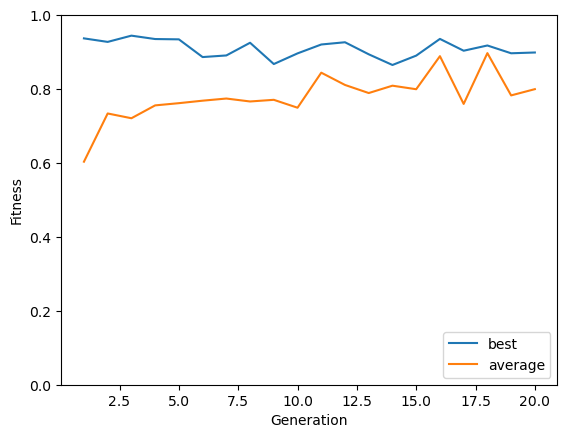

In [1]:
from HP_optim_GA import HP_optimizer

# 超参数
NP = 60  # 初始种群数目
select_ratio = 0.8  # 选择比例
L = 4  # 染色体长度
G = 20  # 进化代数
Pc = 0.8  # 交叉概率
Pm = 0.05  # 变异概率
time_out = 0.1  # 验证时间
requirement_accuracy = 0.99  # 要求准确率

# 初始化超参数优化器
hp_optimizer = HP_optimizer(
    NP=NP,
    select_ratio=select_ratio,
    L=L,
    G=G,
    Pc=Pc,
    Pm=Pm,
    time_out=time_out,
    requirement_accuracy=requirement_accuracy
)

# 开始优化
lr, warmup_propotions, weight_decay, batch_size = hp_optimizer.get_best_hyperparameters()

分割模型训练

lr : 0.00042406897667524046
weight_decay : 0.0004168060315187563
warmup_proportion : 0.004909339200907528
batch_size : 112

D:\annaconda\envs\CTAI_demo\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\annaconda\envs\CTAI_demo\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
D:\Python_projects\CTAI_demo\res_unet.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. Thi


Random initialize model parameters.

Feature extractor: resnet18
lr : 0.00042406897667524046
weight_decay : 0.0004168060315187563
warmup_proportion : 0.004909339200907528
batch_size : 112
Epoch: 1, Loss: 0.8551, Train acc: 5.64, Test acc: 6.82
Epoch: 2, Loss: 0.7997, Train acc: 25.71, Test acc: 25.26
Epoch: 3, Loss: 0.7874, Train acc: 90.73, Test acc: 86.84
Epoch: 4, Loss: 0.7802, Train acc: 92.81, Test acc: 88.70
Epoch: 5, Loss: 0.7740, Train acc: 91.65, Test acc: 87.66
Epoch: 6, Loss: 0.7683, Train acc: 92.85, Test acc: 88.72
Epoch: 7, Loss: 0.7627, Train acc: 92.83, Test acc: 88.71
Epoch: 8, Loss: 0.7578, Train acc: 92.88, Test acc: 88.76
Epoch: 9, Loss: 0.7540, Train acc: 91.65, Test acc: 87.72
Epoch: 10, Loss: 0.7510, Train acc: 92.89, Test acc: 88.76
Epoch: 11, Loss: 0.7458, Train acc: 92.91, Test acc: 88.78
Epoch: 12, Loss: 0.7417, Train acc: 92.91, Test acc: 88.78
Epoch: 13, Loss: 0.7382, Train acc: 92.89, Test acc: 88.76
Epoch: 14, Loss: 0.7353, Train acc: 92.65, Test acc: 88

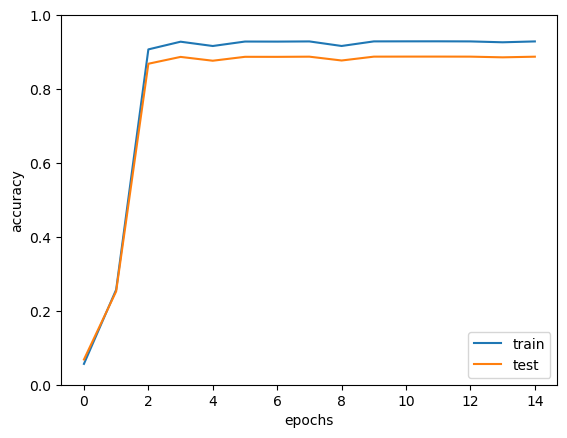

Model parameters saved to models/best_segment_model.pth


In [2]:
import torch
from res_unet import Res_Unet
from trainer import Trainer

lr = 0.00042406897667524046
weight_decay = 0.0004168060315187563
warmup_proportion = 0.004909339200907528
batch_size = 112

device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Res_Unet(output_channel=1, pretrained_model_path="pretrained_model/best_finetune_model.pth").to(device)

batch_size = int(batch_size)
trainer = Trainer(model=model, lr=lr, warmup_proportion=warmup_proportion, weight_decay=weight_decay, batch_size=batch_size)

trainer.train()
trainer.save_model()

分割模型评估

In [4]:
from res_unet import Res_Unet
from utils import *

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Res_Unet(output_channel=1, pretrained_model_path="pretrained_model/best_finetune_model.pth").to(device)
model.load_state_dict(torch.load("models/best_segment_model.pth"))

img_path = "test_segment_images/benign (324).png"
mask_path = "test_segment_images/benign (324)_mask.png"

evaluate_segment_model(model, device, img_path, mask_path)


Random initialize model parameters.

Feature extractor: resnet18
Pixel Accuracy：96.03 %
IoU：0.7027
Precision：0.8135
Recall：0.8027
F1 - value：0.9603


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4536\2842757890.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("models/best_segmen

分割：原始图像、标签和预测结果对比

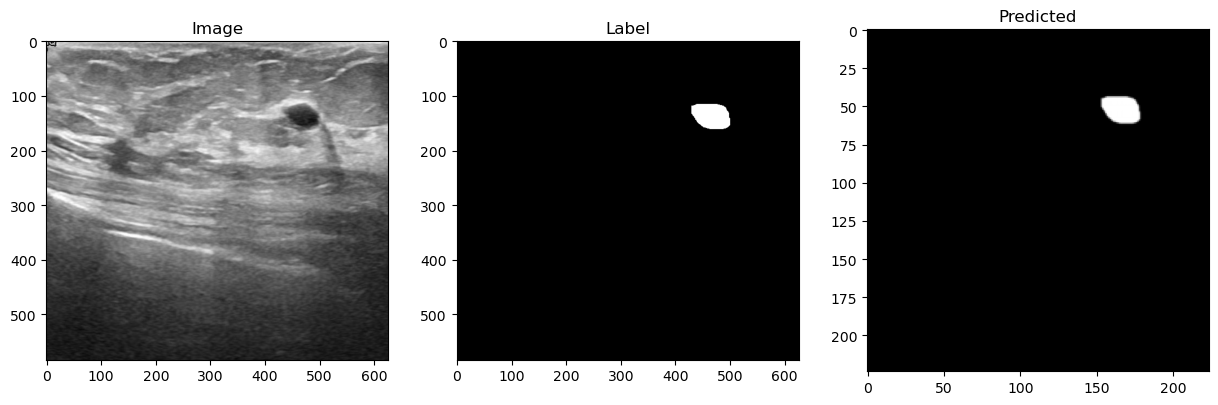

In [9]:
from res_unet import Res_Unet
from utils import *

# 加载模型
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Res_Unet(output_channel=1, pretrained_model_path="pretrained_model/best_finetune_model.pth").to(device)
model.load_state_dict(torch.load("models/best_segment_model.pth"))

img_path = "test_segment_images/benign (324).png"
mask_path = "test_segment_images/benign (324)_mask.png"

segment_result_compare(model, device, img_path, mask_path)